# Decision tree for classification


Classification trees are a type of supervised machine learning algorithm used for categorizing data into distinct classes based on input features.

**Characteristics**

- Squence of if-else questions about the features
- Able to do non-linear relationships between features and lables.


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
df = pd.concat([X, y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<Axes: xlabel='mean radius', ylabel='mean concave points'>

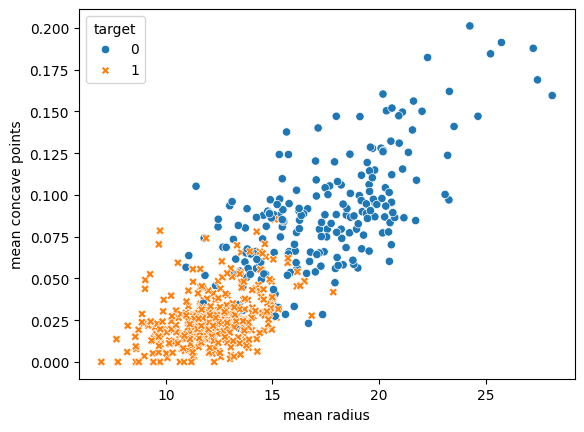

In [6]:
sns.scatterplot(data=X,x='mean radius',y='mean concave points',hue=y,style=y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
dt = DecisionTreeClassifier(criterion='gini',max_depth=8, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        42
           1       0.93      0.99      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [9]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[3,4,5,6,7,8,9,10],
              'min_samples_split':[2,3,4,5,6],
              'min_samples_leaf':[1,2,3,4,5],
              'criterion':['gini','entropy']
              }
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                       param_grid=param_grid,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy')
grid_dt.fit(X_train, y_train)
y_pred_grid = grid_dt.predict(X_test)
print("Best parameters:", grid_dt.best_params_)
print(classification_report(y_test, y_pred_grid))

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Decision Regions

A decision region is the area in the feature space where the model predicts a specific class label. It represents the boundaries created by the decision tree to separate different classes based on the input features.

## Decision Boundary

Surface that separates different decision regions.


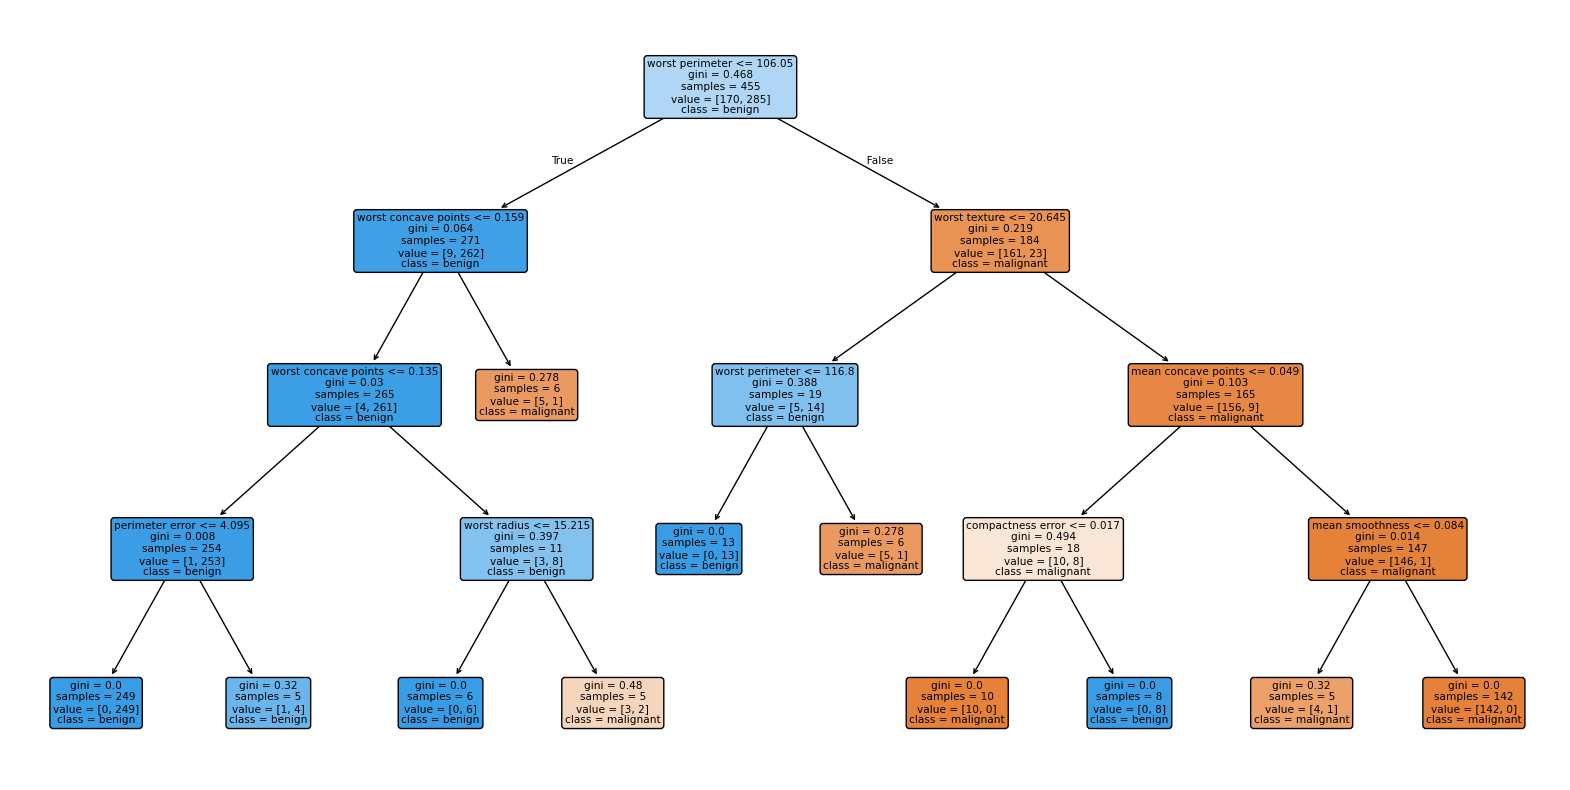

In [10]:
## Visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(grid_dt.best_estimator_,
          feature_names=X.columns,
          class_names=['malignant','benign'],
          filled=True,
          rounded=True)
plt.show()

# Classification tree Learning

The tree contains three kinds of nodes:

- **Root**: Which is the parent node where the tree start to grow
- **Internal node**: Any node has a parent node, there will be a question in it will consider giving two child nodes
- **Leaf**: Which is the last node, have a parent and no children nodes, it contains the class label (it will predict).


## Prediction

The decition tree prediction based on the path from the root to the leaf node, following the questions at each internal node.

### Information Gain

Information gain is a measure used to determine which feature to split on at each node in the decision tree. It quantifies the reduction in uncertainty about the target variable (class label) after splitting the data based on a particular feature.

$$IG(f, sp) = I(parent) - (N_{left} / N_{parent}) * I(left) - (N_{right} / N_{parent}) * I(right)$$

Where:

- $IG(f, sp)$: Information gain for feature $f$ at split point $sp$
- $I(parent)$: Impurity of the parent node before the split
- $I(left)$: Impurity of the left child node after the split
- $I(right)$: Impurity of the right child node after the split
- $N_{left}$: Number of samples in the left child node
- $N_{right}$: Number of samples in the right child node
- $N_{parent}$: Number of samples in the parent node


**How Classification-Tree Learning?**:

When our tree is trained the nodes will grown recursively, at each node (not leaf) the data will be split based on the feature $f$ and split point $sp$ that maximizes the information gain $IG(f, sp)$.

If $IG(f, sp) = 0$, the node will be a leaf node.

Consider this rules is applied on the unconstrained tree only.


**Exercise**:
Growing a classification tree

In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

1. The existence of a node depends on the state of its predecessors.
2. The impurity of a node can be determined using different criteria such as entropy and the gini-index.
3. When the information gain resulting from splitting a node is null, the node is declared as a leaf.
4. When an internal node is split, the split is performed in such a way so that information gain is minimized.


**Solution**: 4

When an internal node is split, the split is performed in such a way so that information gain is maximized, not minimized.

(splitting an internal node always involves maximizing information gain!)
